# MLD Project

## Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

from scipy.stats import skew

from sklearn.model_selection import cross_validate
import warnings
from sklearn.linear_model import LinearRegression


# These becuase we have many features, and we want to display all of them
pd.set_option("display.max_rows", 30)
pd.set_option("display.max_columns", 30)


plt.rcParams["figure.figsize"] = (7, 4)
import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

## Read Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv("/content/drive/MyDrive/ final_scout_not_dummy.csv")
df

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800
1,Audi A1,Sedans,14500,Price negotiable,80000.000,Used,Benzine,7.000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600
2,Audi A1,Sedans,14640,VAT deductible,83450.000,Used,Diesel,7.000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800
3,Audi A1,Sedans,14500,VAT deductible,73000.000,Used,Diesel,6.000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800
4,Audi A1,Sedans,16790,VAT deductible,16200.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15910,Renault Espace,Van,39950,VAT deductible,1647.363,New,Diesel,6.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Touch screen","ABS,Central door lock,Central door lock with r...",0.000,1.000,147.000,0,Metallic,Part/Full Leather,Automatic,1997.000,1758.000,front,5.300
15911,Renault Espace,Van,39885,VAT deductible,9900.000,Used,Benzine,7.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,R...","Alloy wheels,Touch screen,Voice Control","ABS,Adaptive Cruise Control,Blind spot monitor...",0.000,1.000,165.000,0,Metallic,Cloth,Automatic,1798.000,1708.000,front,7.400
15912,Renault Espace,Van,39875,VAT deductible,15.000,Pre-registered,Diesel,6.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,"ABS,Adaptive Cruise Control,Blind spot monitor...",0.000,1.000,146.000,1,Metallic,Part/Full Leather,Automatic,1997.000,1734.000,front,5.300
15913,Renault Espace,Van,39700,VAT deductible,10.000,Pre-registered,Diesel,6.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Radio,USB","Alloy wheels,Touch screen","ABS,Blind spot monitor,Driver-side airbag,Elec...",0.000,1.000,147.000,0,Metallic,Part/Full Leather,Automatic,1997.000,1758.000,front,5.300


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [7]:
df.shape

(15915, 23)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,15915.000,18024.381,7381.679,4950.000,12850.000,16900.000,21900.000,74600.000
km,15915.000,32089.996,36977.215,0.000,1920.500,20413.000,46900.000,317000.000
Gears,15915.000,5.937,0.705,5.000,5.000,6.000,6.000,8.000
age,15915.000,1.390,1.121,0.000,0.000,1.000,2.000,3.000
Previous_Owners,15915.000,1.043,0.339,0.000,1.000,1.000,1.000,4.000
hp_kW,15915.000,88.499,26.674,40.000,66.000,85.000,103.000,294.000
Inspection_new,15915.000,0.247,0.431,0.000,0.000,0.000,0.000,1.000
Displacement_cc,15915.000,1428.662,275.804,890.000,1229.000,1461.000,1598.000,2967.000
Weight_kg,15915.000,1337.701,199.682,840.000,1165.000,1295.000,1472.000,2471.000
cons_comb,15915.000,4.832,0.868,3.000,4.100,4.800,5.400,9.100


In [9]:
df.describe(include="O").T

,count,unique,top,freq
make_model,15915,9,Audi A3,3097
body_type,15915,8,Sedans,8004
vat,15915,2,VAT deductible,15044
Type,15915,5,Used,11095
Fuel,15915,4,Benzine,8548
Comfort_Convenience,15915,6196,"Air conditioning,Electrical side mirrors,Hill ...",388
Entertainment_Media,15915,346,"Bluetooth,Hands-free equipment,On-board comput...",1737
Extras,15915,659,Alloy wheels,5785
Safety_Security,15915,4442,"ABS,Central door lock,Daytime running lights,D...",729
Paint_Type,15915,3,Metallic,15246


In [10]:
# Check duplicates
df.duplicated().sum()

1673

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
# Check duplicates again
df.duplicated().sum()

0

In [13]:
df.reset_index(drop=True, inplace=True) # Reset the indexes after dropping the rows

In [14]:
# check Null values
df.isnull().sum().any()

False

In [15]:
df.corr(numeric_only= True)

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
price,1.000,-0.402,0.528,-0.481,-0.149,0.698,0.003,0.287,0.460,0.274
km,-0.402,1.000,-0.038,0.749,0.159,0.013,-0.036,0.306,0.153,-0.295
Gears,0.528,-0.038,1.000,-0.079,-0.037,0.451,-0.006,0.338,0.332,0.007
age,-0.481,0.749,-0.079,1.000,0.314,-0.093,-0.024,0.198,0.061,-0.339
Previous_Owners,-0.149,0.159,-0.037,0.314,1.000,-0.032,0.037,0.030,0.004,-0.033
hp_kW,0.698,0.013,0.451,-0.093,-0.032,1.000,0.045,0.606,0.641,0.391
Inspection_new,0.003,-0.036,-0.006,-0.024,0.037,0.045,1.000,-0.024,-0.041,0.142
Displacement_cc,0.287,0.306,0.338,0.198,0.030,0.606,-0.024,1.000,0.567,0.055
Weight_kg,0.460,0.153,0.332,0.061,0.004,0.641,-0.041,0.567,1.000,0.089
cons_comb,0.274,-0.295,0.007,-0.339,-0.033,0.391,0.142,0.055,0.089,1.000


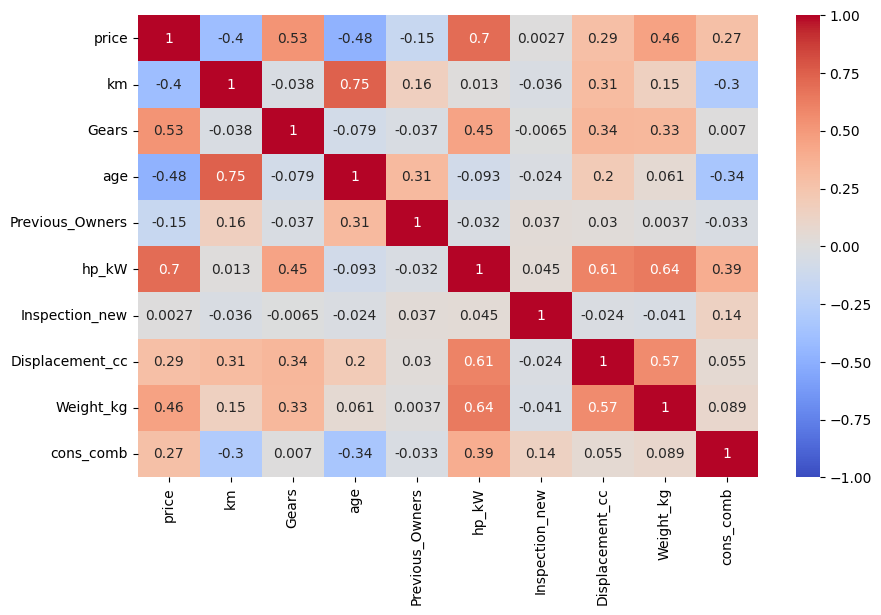

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1, annot =True, cmap="coolwarm");

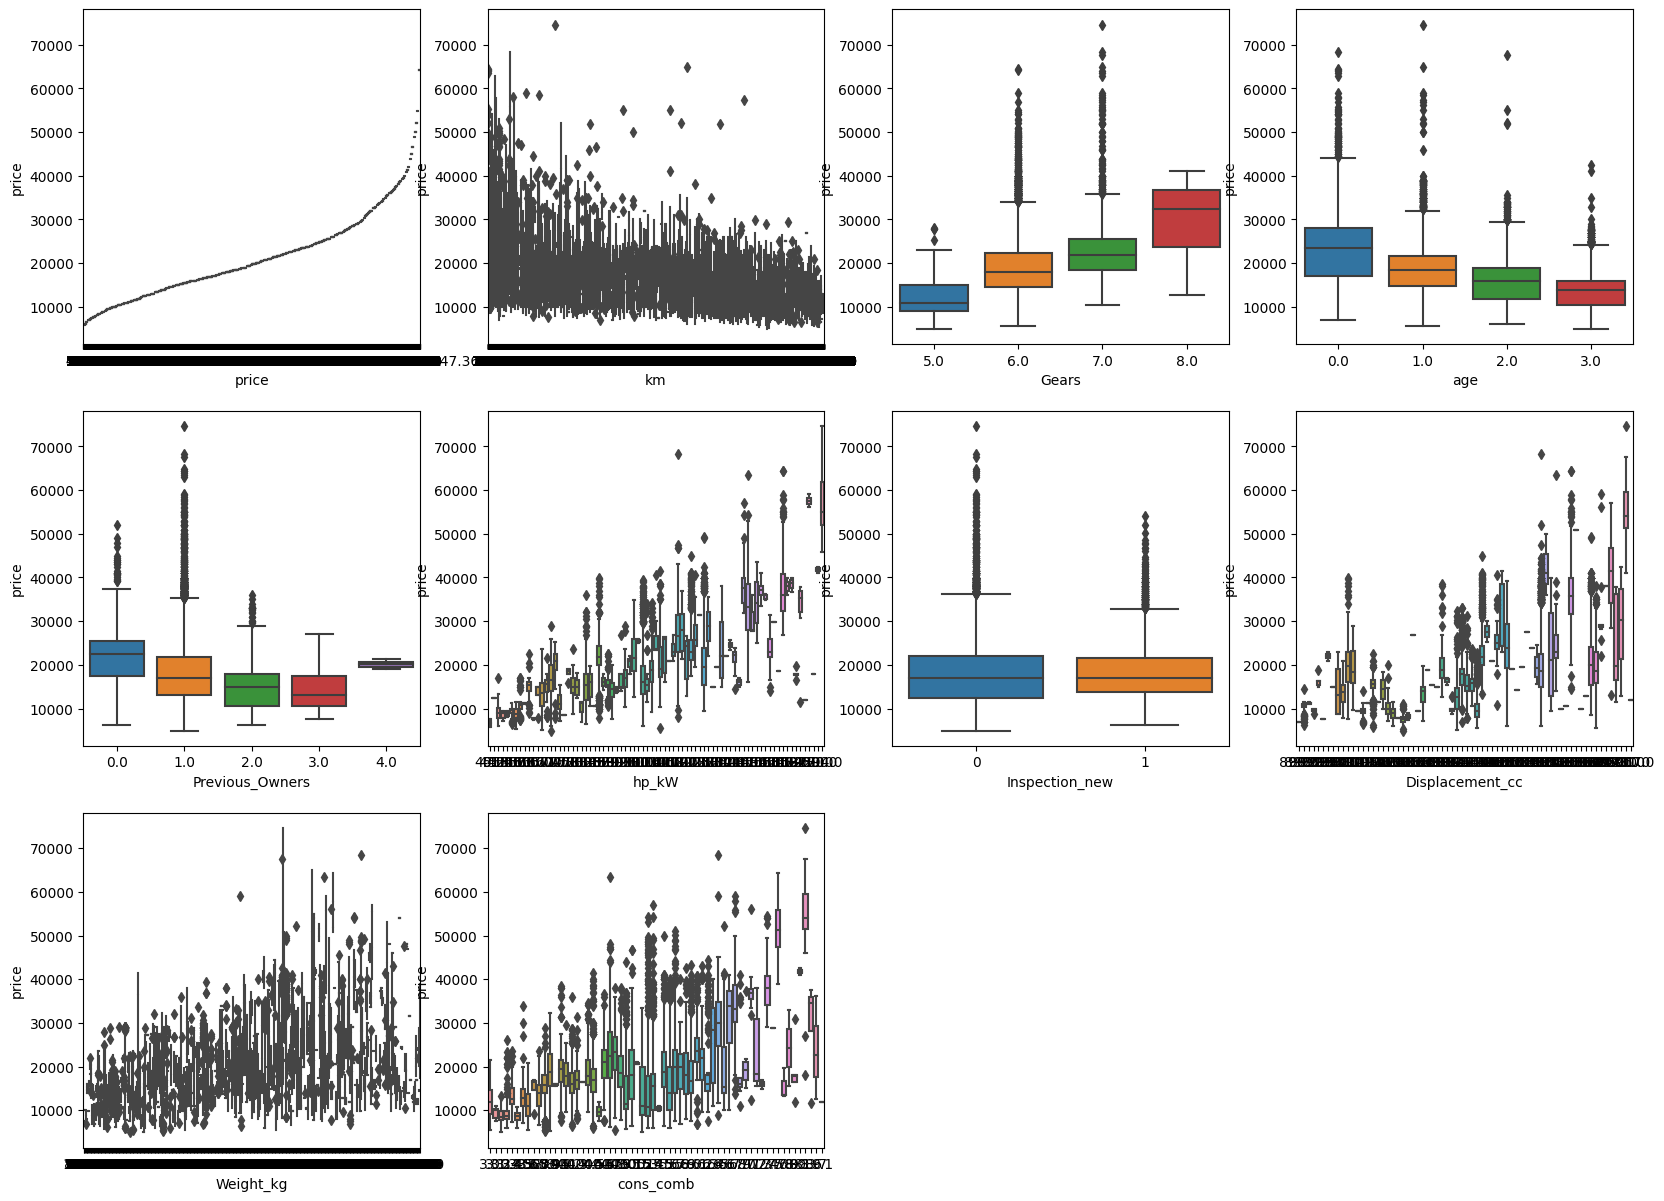

In [17]:
# Detecting outliers

index = 0
plt.figure(figsize=(20,20))
for feature in df.select_dtypes("number"):
    if feature != "make_model":
        index += 1
        plt.subplot(4,4,index)
        sns.boxplot(x=feature,y='price',data=df)

# from box plots, we can have same insight as the pair plot

## VIF

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [19]:
numeric_columns =  df.corr(numeric_only= True).columns.tolist()[1:]

vif_data = pd.DataFrame()
predictors = numeric_columns
vif_data["Variable"] = predictors

In [20]:
# Calculate VIF scores for each predictor
vif_data["VIF"] = [
    variance_inflation_factor(df[numeric_columns].values, i) for i in range(len(predictors))
]

In [21]:
vif_data
# check the VIF scores:
# 1   -> no correlation
# 1-5 -> ok
# >5  -> Alert! Be cautious and inspect more. Consider removing.
# >10 -> Severe multicolliniearity!!!

,Variable,VIF
0,km,4.438
1,Gears,55.935
2,age,6.812
3,Previous_Owners,11.584
4,hp_kW,25.389
5,Inspection_new,1.382
6,Displacement_cc,53.450
7,Weight_kg,71.404
8,cons_comb,30.188


In [22]:
numeric_columns.remove('Weight_kg') ## Remove the highest vif score

In [23]:
vif_data = pd.DataFrame()
predictors = numeric_columns
vif_data["Variable"] = predictors
# Calculate VIF scores for each predictor
vif_data["VIF"] = [
    variance_inflation_factor(df[numeric_columns].values, i) for i in range(len(predictors))
]
vif_data
# check the VIF scores:
# 1   -> no correlation
# 1-5 -> ok
# >5  -> Alert! Be cautious and inspect more. Consider removing.
# >10 -> Severe multicolliniearity!!!

,Variable,VIF
0,km,4.430
1,Gears,45.707
2,age,6.798
3,Previous_Owners,11.481
4,hp_kW,23.298
5,Inspection_new,1.377
6,Displacement_cc,47.554
7,cons_comb,29.247


In [24]:
numeric_columns.remove('Displacement_cc') ## Remove the highest vif score

In [25]:
vif_data = pd.DataFrame()
predictors = numeric_columns
vif_data["Variable"] = predictors
# Calculate VIF scores for each predictor
vif_data["VIF"] = [
    variance_inflation_factor(df[numeric_columns].values, i) for i in range(len(predictors))
]
vif_data
# check the VIF scores:
# 1   -> no correlation
# 1-5 -> ok
# >5  -> Alert! Be cautious and inspect more. Consider removing.
# >10 -> Severe multicolliniearity!!!

,Variable,VIF
0,km,4.226
1,Gears,35.185
2,age,6.740
3,Previous_Owners,11.444
4,hp_kW,17.672
5,Inspection_new,1.374
6,cons_comb,28.870


In [26]:
numeric_columns.remove('cons_comb')

In [27]:
vif_data = pd.DataFrame()
predictors = numeric_columns
vif_data["Variable"] = predictors
# Calculate VIF scores for each predictor
vif_data["VIF"] = [
    variance_inflation_factor(df[numeric_columns].values, i) for i in range(len(predictors))
]
vif_data
# check the VIF scores:
# 1   -> no correlation
# 1-5 -> ok
# >5  -> Alert! Be cautious and inspect more. Consider removing.
# >10 -> Severe multicolliniearity!!!

,Variable,VIF
0,km,4.189
1,Gears,24.491
2,age,6.691
3,Previous_Owners,10.708
4,hp_kW,15.599
5,Inspection_new,1.348


In [28]:
## Converting Extras to numbers
df.Extras

0           Alloy wheels,Catalytic Converter,Voice Control
1        Alloy wheels,Sport seats,Sport suspension,Voic...
2                               Alloy wheels,Voice Control
3                   Alloy wheels,Sport seats,Voice Control
4        Alloy wheels,Sport package,Sport suspension,Vo...
                               ...                        
14237              Alloy wheels,Touch screen,Voice Control
14238                            Alloy wheels,Touch screen
14239    Alloy wheels,Catalytic Converter,Sport suspens...
14240              Alloy wheels,Touch screen,Voice Control
14241                                         Alloy wheels
Name: Extras, Length: 14242, dtype: object

In [29]:
df.Extras = df.Extras.apply(lambda x: len(x.split(',')))
df.Extras = df.Extras.astype("O")

In [30]:
from collections import Counter

def get_word_frequencies(column_data):
    # Concatenate all text in the column into a single string
    full_text = ' '.join(column_data.astype(str).tolist())

    # Tokenize the text into words (you might need a more advanced tokenizer based on your requirements)
    words = full_text.split(",")

    # Count the frequency of each word
    word_frequencies = Counter(words)

    return word_frequencies

In [31]:
# Get word frequencies for the 'Comfort_Convenience'
word_frequencies = get_word_frequencies(df['Comfort_Convenience'])

# Print the unique words and their frequencies
for word, frequency in word_frequencies.items():
    print(f'{word}: {frequency}')

Air conditioning: 1
Armrest: 6916
Automatic climate control: 8384
Cruise control: 10065
Electrical side mirrors: 11225
Hill Holder: 6375
Leather steering wheel: 8861
Light sensor: 7334
Multi-function steering wheel: 10603
Navigation system: 7714
Park Distance Control: 9616
Parking assist system sensors rear: 9134
Power windows: 11244
Rain sensor: 7598
Seat heating: 5447
Start-stop system Air conditioning: 6986
Lumbar support: 3235
Start-stop system: 1150
Tinted windows Air conditioning: 1311
Parking assist system sensors front: 5736
Start-stop system Air suspension: 1
Auxiliary heating: 227
Heads-up display: 573
Split rear seats: 1638
Keyless central door lock: 2352
Power windows Air conditioning: 1885
Split rear seats Air conditioning: 664
Rain sensor Air conditioning: 616
Electrically heated windshield: 885
Seat ventilation: 740
Wind deflector Air conditioning: 39
Automatic climate control Air conditioning: 24
Tinted windows Leather steering wheel: 2
Start-stop system Armrest: 53
Sta

In [32]:
# Get word frequencies for the 'Entertainment_Media'
word_frequencies = get_word_frequencies(df['Entertainment_Media'])

# Print the unique words and their frequencies
for word, frequency in word_frequencies.items():
    print(f'{word}: {frequency}')

Bluetooth: 1
Hands-free equipment: 8933
On-board computer: 10118
Radio Bluetooth: 2814
Radio: 7647
Sound system MP3: 9
On-board computer Bluetooth: 548
CD player: 3959
MP3: 5577
Sound system: 1466
USB Bluetooth: 6570
USB CD player: 286
Radio Radio Radio Bluetooth: 16
USB Radio Bluetooth: 157
Digital radio: 1905
USB Radio: 24
Sound system Bluetooth: 376
USB Radio Radio Bluetooth: 18
Radio On-board computer: 206
Radio CD player: 209
Radio Radio Bluetooth: 100
CD player Bluetooth: 9
Radio Radio On-board computer: 9
Radio CD player CD player: 3
Radio MP3: 42
Radio CD player On-board computer: 1
USB On-board computer: 241
Sound system CD player Bluetooth: 2
On-board computer Hands-free equipment: 13
MP3 Bluetooth: 9
Sound system Radio Bluetooth: 16
USB Radio CD player: 11
Radio Radio CD player: 7
MP3 Hands-free equipment: 1
Sound system CD player: 25
On-board computer CD player: 28
Radio On-board computer Bluetooth: 60
USB On-board computer Bluetooth: 197
USB MP3: 50
Hands-free equipment Bl

In [33]:
# Get word frequencies for the 'Safety_Security'
word_frequencies = get_word_frequencies(df['Safety_Security'])

# Print the unique words and their frequencies
for word, frequency in word_frequencies.items():
    print(f'{word}: {frequency}')

ABS: 1
Central door lock: 11915
Daytime running lights: 10015
Driver-side airbag: 13385
Electronic stability control: 12597
Fog lights: 7954
Immobilizer: 10193
Isofix: 11209
Passenger-side airbag: 12979
Power steering: 12725
Side airbag: 11758
Tire pressure monitoring system: 9008
Traction control: 4071
Xenon headlights ABS: 3273
Central door lock with remote control: 2341
Head airbag: 2100
Traction control ABS: 6397
Alarm system: 1781
Driver drowsiness detection: 472
Emergency system: 1454
Tire pressure monitoring system ABS: 1170
LED Headlights: 2931
Adaptive headlights: 1942
Traction control Central door lock: 105
Side airbag ABS: 803
LED Daytime Running Lights: 5331
Xenon headlights Alarm system: 23
Rear airbag: 852
Power steering ABS: 261
Passenger-side airbag ABS: 37
Xenon headlights Central door lock: 66
Traction control Daytime running lights: 31
Emergency brake assistant: 3042
Tire pressure monitoring system Central door lock: 28
Adaptive Cruise Control: 1219
Night view assist

In [34]:
df.Entertainment_Media = df.Entertainment_Media.apply(lambda x: len(x.split(',')))
df.Entertainment_Media = df.Entertainment_Media.astype("O")

In [35]:
df.Safety_Security = df.Safety_Security.apply(lambda x: len(x.split(',')))
df.Safety_Security = df.Safety_Security.astype("O")

In [36]:
df.Comfort_Convenience = df.Comfort_Convenience.apply(lambda x: len(x.split(',')))
df.Comfort_Convenience = df.Comfort_Convenience.astype("O")

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14242 entries, 0 to 14241
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           14242 non-null  object 
 1   body_type            14242 non-null  object 
 2   price                14242 non-null  int64  
 3   vat                  14242 non-null  object 
 4   km                   14242 non-null  float64
 5   Type                 14242 non-null  object 
 6   Fuel                 14242 non-null  object 
 7   Gears                14242 non-null  float64
 8   Comfort_Convenience  14242 non-null  object 
 9   Entertainment_Media  14242 non-null  object 
 10  Extras               14242 non-null  object 
 11  Safety_Security      14242 non-null  object 
 12  age                  14242 non-null  float64
 13  Previous_Owners      14242 non-null  float64
 14  hp_kW                14242 non-null  float64
 15  Inspection_new       14242 non-null 

<Axes: xlabel='Extras', ylabel='price'>

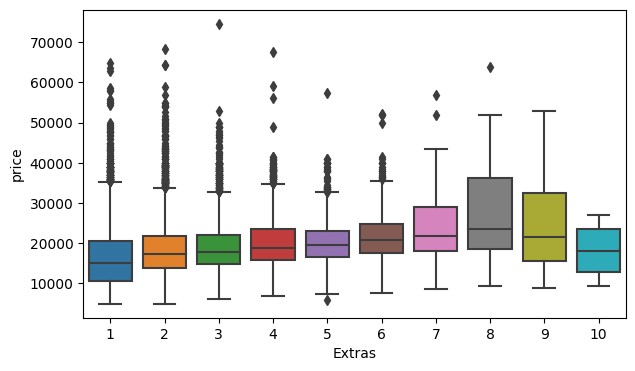

In [38]:
sns.boxplot(data=df,
                y="price",
                x="Extras"
               )

<Axes: xlabel='Comfort_Convenience', ylabel='price'>

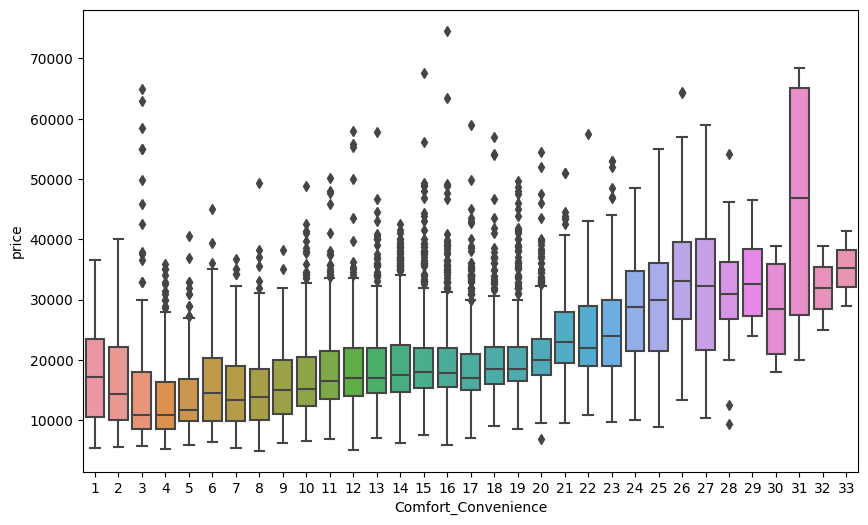

In [39]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,
                y="price",
                x="Comfort_Convenience"
               )

<Axes: xlabel='Entertainment_Media', ylabel='price'>

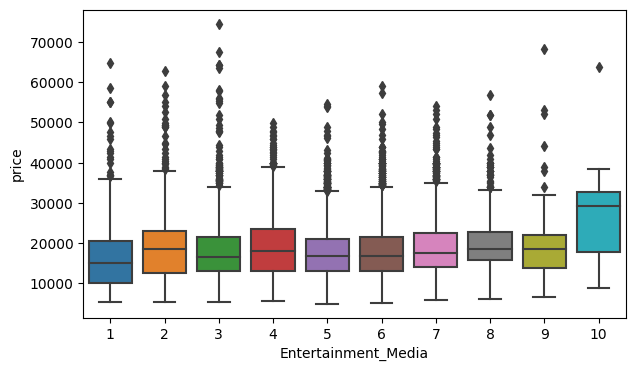

In [40]:
sns.boxplot(data=df,
                y="price",
                x="Entertainment_Media"
               )

<Axes: xlabel='Safety_Security', ylabel='price'>

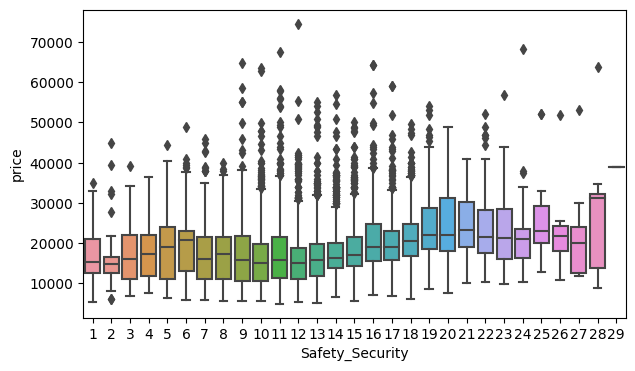

In [41]:
sns.boxplot(data=df,
                y="price",
                x="Safety_Security"
               )

<Axes: xlabel='Inspection_new', ylabel='price'>

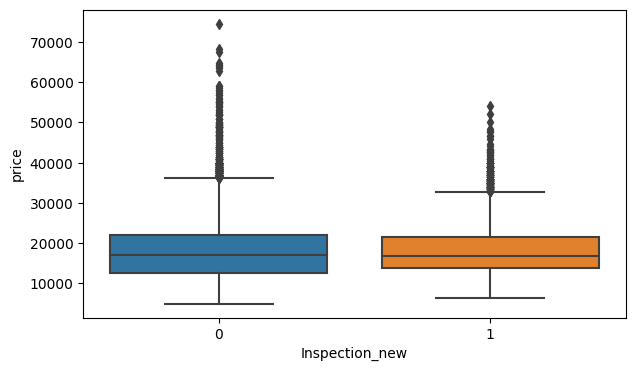

In [42]:
sns.boxplot(data=df,
                y="price",
                x="Inspection_new"
               )

In [43]:
df.vat.value_counts()

VAT deductible      13426
Price negotiable      816
Name: vat, dtype: int64

In [44]:
df.Type.value_counts()

Used              10172
New                1369
Pre-registered     1029
Employee's car      905
Demonstration       767
Name: Type, dtype: int64

In [45]:
df.Drive_chain.value_counts()

front    14067
4WD        171
rear         4
Name: Drive_chain, dtype: int64

In [46]:
df.Gears.value_counts()

6.000    7764
5.000    3771
7.000    2504
8.000     203
Name: Gears, dtype: int64

In [47]:
df.drop(["vat", "Displacement_cc", 'Weight_kg', 'cons_comb'], axis = 1,inplace=True) # Husam's edit removed Displacement_cc
df

,make_model,body_type,price,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Drive_chain
0,Audi A1,Sedans,15770,56013.000,Used,Diesel,7.000,16,4,3,14,3.000,2.000,66.000,1,Metallic,Cloth,Automatic,front
1,Audi A1,Sedans,14500,80000.000,Used,Benzine,7.000,9,5,4,15,2.000,1.000,141.000,0,Metallic,Cloth,Automatic,front
2,Audi A1,Sedans,14640,83450.000,Used,Diesel,7.000,13,2,2,12,3.000,1.000,85.000,0,Metallic,Cloth,Automatic,front
3,Audi A1,Sedans,14500,73000.000,Used,Diesel,6.000,16,8,3,14,3.000,1.000,66.000,0,Metallic,Cloth,Automatic,front
4,Audi A1,Sedans,16790,16200.000,Used,Diesel,7.000,13,7,4,13,3.000,1.000,66.000,1,Metallic,Cloth,Automatic,front
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14237,Renault Espace,Van,39980,100.000,Pre-registered,Diesel,6.000,27,7,3,18,0.000,1.000,118.000,0,Metallic,Part/Full Leather,Automatic,front
14238,Renault Espace,Van,39950,1647.363,New,Diesel,6.000,20,6,2,19,0.000,1.000,147.000,0,Metallic,Part/Full Leather,Automatic,front
14239,Renault Espace,Van,39950,1000.000,Demonstration,Benzine,6.000,26,7,5,19,0.000,1.000,165.000,0,Metallic,Part/Full Leather,Automatic,front
14240,Renault Espace,Van,39885,9900.000,Used,Benzine,7.000,23,5,3,19,0.000,1.000,165.000,0,Metallic,Cloth,Automatic,front


## Modeling

In [48]:
df.describe(include="O").columns

Index(['make_model', 'body_type', 'Type', 'Fuel', 'Comfort_Convenience',
       'Entertainment_Media', 'Extras', 'Safety_Security', 'Paint_Type',
       'Upholstery_type', 'Gearing_Type', 'Drive_chain'],
      dtype='object')

In [118]:
cat_onehot = ['make_model', 'body_type', 'Fuel', 'Upholstery_type', 'Gearing_Type', 'Drive_chain', 'Paint_Type']
cat_ordinal = ['Type']
cat_for_Type = ["Used", "New", "Pre-registered", "Employee's car", "Demonstration"]

# We specify the features we will convert to onohotencoder in the cat_onehot list,
# and the features that we will convert to ordinalencoder in the cat_ordinal list.

# Since the model does not know in which order the features we will transform will be numbered,
# we give this order to the model manually.

In [50]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

column_trans = make_column_transformer(
                        (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot),
                        (OrdinalEncoder(categories= [cat_for_Type],
                                       handle_unknown="use_encoded_value",
                                        unknown_value=-1) ,cat_ordinal),
                         remainder= StandardScaler(),
                         verbose_feature_names_out=False)

column_trans=column_trans.set_output(transform="pandas")


# make_column_transformer function automates transformations to features. It transforms the features
# in order according to the order we will give into this function.

# What does the (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot) code do?
# With the handle_unknown = "ignore" parameter, onehotencoder converts all the features in
# the cat_onehot list so that all categorical data passed in the test set and
# not in the train set will be converted to 0.

# What does the (OrdinalEncoder(categories=categories), cat_ordinal) code do?
# After the onehotencoder conversion to the relevant features, all features in the cat_ordinal list
# perform ordinal encoder conversion according to the hierarchical order of the unique categorical
# observations in the categories list.

# IMPORTANT NOTE: The order of the categories parameter of the OrdinalEncoder(categories=) function must be
# the same as the order of the features in the cat_ordinal list, or you will get an error.

# With remainder='passthrough' it means to leave all other features that are not converted.
# if the remainder is "dropped" with the default value, all non-converted features will be dropped from df.
# remainder= If we do MinMaxScaler() or StandardScale(), other features will be scaled except for
# the transformed features.

# verbose_feature_names_out=True make_column_transform function, so that it is clear which conversion function
# does which feature, "onehotencoder<__>" prefix at the beginning of onehotencoder conversions,
# ordinalencoder conversions. It is prefixed with "ordinalencoder<__>", and those with remainder operations
# are prefixed with "remainder__". If you want to remove these prefixes, we need to set verbose_feature<_>names_out=False.

In [51]:
y = df.price
X = df.drop("price", axis=1)
print(y)
display(X)

0        15770
1        14500
2        14640
3        14500
4        16790
         ...  
14237    39980
14238    39950
14239    39950
14240    39885
14241    39875
Name: price, Length: 14242, dtype: int64


,make_model,body_type,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Drive_chain
0,Audi A1,Sedans,56013.000,Used,Diesel,7.000,16,4,3,14,3.000,2.000,66.000,1,Metallic,Cloth,Automatic,front
1,Audi A1,Sedans,80000.000,Used,Benzine,7.000,9,5,4,15,2.000,1.000,141.000,0,Metallic,Cloth,Automatic,front
2,Audi A1,Sedans,83450.000,Used,Diesel,7.000,13,2,2,12,3.000,1.000,85.000,0,Metallic,Cloth,Automatic,front
3,Audi A1,Sedans,73000.000,Used,Diesel,6.000,16,8,3,14,3.000,1.000,66.000,0,Metallic,Cloth,Automatic,front
4,Audi A1,Sedans,16200.000,Used,Diesel,7.000,13,7,4,13,3.000,1.000,66.000,1,Metallic,Cloth,Automatic,front
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14237,Renault Espace,Van,100.000,Pre-registered,Diesel,6.000,27,7,3,18,0.000,1.000,118.000,0,Metallic,Part/Full Leather,Automatic,front
14238,Renault Espace,Van,1647.363,New,Diesel,6.000,20,6,2,19,0.000,1.000,147.000,0,Metallic,Part/Full Leather,Automatic,front
14239,Renault Espace,Van,1000.000,Demonstration,Benzine,6.000,26,7,5,19,0.000,1.000,165.000,0,Metallic,Part/Full Leather,Automatic,front
14240,Renault Espace,Van,9900.000,Used,Benzine,7.000,23,5,3,19,0.000,1.000,165.000,0,Metallic,Cloth,Automatic,front


In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
from sklearn.pipeline import Pipeline
operations = [("OneHot_Ordinal_Encoder", column_trans)]

LC_pipe = Pipeline(steps=operations).set_output(transform="pandas")
X_train_transformed = LC_pipe.fit_transform(X_train)
X_test_transformed = LC_pipe.transform(X_test)

# If we want the outputs of the given transform algorithms to be dataframes,
# you can add set_output(transform="pandas") to the end of the pipeline.

## Lazy predict

In [54]:
!pip install lazypredict

In [55]:
from lazypredict.Supervised import LazyRegressor

clf = LazyRegressor(verbose=1, ignore_warnings=True, custom_metric=None)

models,predictions = clf.fit(X_train_transformed, X_test_transformed, y_train, y_test)
models

  2%|▏         | 1/42 [00:02<01:41,  2.49s/it]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.7430416336932089, 'Adjusted R-Squared': 0.7391025214824452, 'RMSE': 3788.8366750484633, 'Time taken': 2.4860923290252686}


  7%|▋         | 3/42 [00:04<00:44,  1.15s/it]

{'Model': 'BaggingRegressor', 'R-Squared': 0.9389083890296309, 'Adjusted R-Squared': 0.9379718687901565, 'RMSE': 1847.4185162109234, 'Time taken': 1.6418404579162598}
{'Model': 'BayesianRidge', 'R-Squared': 0.8557230823542231, 'Adjusted R-Squared': 0.8535113506398672, 'RMSE': 2839.049280245627, 'Time taken': 0.13407135009765625}


 14%|█▍        | 6/42 [00:04<00:15,  2.35it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.9024083868865438, 'Adjusted R-Squared': 0.9009123300723269, 'RMSE': 2334.967024736245, 'Time taken': 0.3679053783416748}
{'Model': 'DummyRegressor', 'R-Squared': -0.0005542520215129354, 'Adjusted R-Squared': -0.01589251684751125, 'RMSE': 7476.439517498171, 'Time taken': 0.034399986267089844}
{'Model': 'ElasticNet', 'R-Squared': 0.8205586635505175, 'Adjusted R-Squared': 0.8178078694445183, 'RMSE': 3166.1810914349576, 'Time taken': 0.07709884643554688}


 19%|█▉        | 8/42 [00:05<00:11,  2.86it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.5056764910519407, 'Adjusted R-Squared': 0.4980986262088867, 'RMSE': 5255.089729360414, 'Time taken': 0.4029121398925781}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.8904658412490845, 'Adjusted R-Squared': 0.88878670797768, 'RMSE': 2473.7128890763743, 'Time taken': 0.15793347358703613}


 21%|██▏       | 9/42 [00:18<02:11,  3.99s/it]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9455405083535077, 'Adjusted R-Squared': 0.9447056569664135, 'RMSE': 1744.2602948400204, 'Time taken': 13.026086807250977}


 24%|██▍       | 10/42 [00:18<01:33,  2.91s/it]

{'Model': 'GammaRegressor', 'R-Squared': 0.7867638004009364, 'Adjusted R-Squared': 0.7834949388741058, 'RMSE': 3451.476893129128, 'Time taken': 0.2706634998321533}


 26%|██▌       | 11/42 [01:21<10:31, 20.37s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -198.04847214056142, 'Adjusted R-Squared': -201.09983909316182, 'RMSE': 105451.78306834763, 'Time taken': 62.389803409576416}


 29%|██▊       | 12/42 [01:23<07:28, 14.94s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9198283808663783, 'Adjusted R-Squared': 0.9185993685231535, 'RMSE': 2116.3370287260905, 'Time taken': 1.981083631515503}


 33%|███▎      | 14/42 [01:28<03:57,  8.49s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9389768665560069, 'Adjusted R-Squared': 0.9380413960611436, 'RMSE': 1846.3828411129994, 'Time taken': 5.135770082473755}
{'Model': 'HuberRegressor', 'R-Squared': 0.8380729893673314, 'Adjusted R-Squared': 0.8355906858175258, 'RMSE': 3007.6974842158284, 'Time taken': 0.14388132095336914}


 36%|███▌      | 15/42 [01:28<02:42,  6.03s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.8832315836024015, 'Adjusted R-Squared': 0.8814415508376612, 'RMSE': 2554.095892042698, 'Time taken': 0.23321294784545898}


 38%|███▊      | 16/42 [01:48<04:24, 10.18s/it]

{'Model': 'KernelRidge', 'R-Squared': -5.005204740441926, 'Adjusted R-Squared': -5.09726313753248, 'RMSE': 18316.328029039843, 'Time taken': 19.918503284454346}
{'Model': 'Lars', 'R-Squared': 0.8557229004044805, 'Adjusted R-Squared': 0.8535111659008772, 'RMSE': 2839.0510704284625, 'Time taken': 0.053400516510009766}


 43%|████▎     | 18/42 [01:48<02:13,  5.54s/it]

{'Model': 'LarsCV', 'R-Squared': 0.8557101536464078, 'Adjusted R-Squared': 0.853498223737957, 'RMSE': 2839.1764815227293, 'Time taken': 0.16128993034362793}


 45%|████▌     | 19/42 [01:49<01:39,  4.32s/it]

{'Model': 'Lasso', 'R-Squared': 0.8557282456450931, 'Adjusted R-Squared': 0.8535165930827897, 'RMSE': 2838.9984787431417, 'Time taken': 0.578601598739624}


 48%|████▊     | 20/42 [01:49<01:12,  3.27s/it]

{'Model': 'LassoCV', 'R-Squared': 0.8557080630116856, 'Adjusted R-Squared': 0.853496101054289, 'RMSE': 2839.1970500505386, 'Time taken': 0.3246028423309326}
{'Model': 'LassoLars', 'R-Squared': 0.8557282866035022, 'Adjusted R-Squared': 0.8535166346690817, 'RMSE': 2838.998075750644, 'Time taken': 0.04986763000488281}


 55%|█████▍    | 23/42 [01:49<00:28,  1.50s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.8557101536464078, 'Adjusted R-Squared': 0.853498223737957, 'RMSE': 2839.1764815227293, 'Time taken': 0.18580341339111328}
{'Model': 'LassoLarsIC', 'R-Squared': 0.8557268924903132, 'Adjusted R-Squared': 0.8535152191844606, 'RMSE': 2839.01179249042, 'Time taken': 0.11026144027709961}


 60%|█████▉    | 25/42 [01:50<00:15,  1.07it/s]

{'Model': 'LinearRegression', 'R-Squared': 0.8557926764830593, 'Adjusted R-Squared': 0.8535820116305715, 'RMSE': 2838.364468714748, 'Time taken': 0.07702064514160156}
{'Model': 'LinearSVR', 'R-Squared': -0.570380505672581, 'Adjusted R-Squared': -0.5944540749217508, 'RMSE': 9366.491666786736, 'Time taken': 0.06879734992980957}


 62%|██████▏   | 26/42 [02:06<01:08,  4.26s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.7683429153074787, 'Adjusted R-Squared': 0.7647916658808197, 'RMSE': 3597.4709586435515, 'Time taken': 15.870310068130493}


 69%|██████▉   | 29/42 [02:16<00:44,  3.40s/it]

{'Model': 'NuSVR', 'R-Squared': 0.04332266982677191, 'Adjusted R-Squared': 0.028657028045150135, 'RMSE': 7310.6710822794075, 'Time taken': 10.17170524597168}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.7475209639146018, 'Adjusted R-Squared': 0.743650518798141, 'RMSE': 3755.6677521094603, 'Time taken': 0.045497894287109375}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.770589494391602, 'Adjusted R-Squared': 0.767072684501705, 'RMSE': 3579.9845667256773, 'Time taken': 0.10091257095336914}


 71%|███████▏  | 30/42 [02:16<00:32,  2.69s/it]

{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.8319205674187838, 'Adjusted R-Squared': 0.8293439486662019, 'RMSE': 3064.3035901569656, 'Time taken': 0.2789006233215332}


 74%|███████▍  | 31/42 [02:18<00:26,  2.45s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.8899262155200867, 'Adjusted R-Squared': 0.8882388099113037, 'RMSE': 2479.798840189099, 'Time taken': 1.6829650402069092}


 79%|███████▊  | 33/42 [02:19<00:15,  1.74s/it]

{'Model': 'RANSACRegressor', 'R-Squared': 0.8175622739802884, 'Adjusted R-Squared': 0.8147655459165281, 'RMSE': 3192.506782227251, 'Time taken': 1.3547489643096924}


 86%|████████▌ | 36/42 [02:26<00:10,  1.70s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9435877776853328, 'Adjusted R-Squared': 0.9427229913895999, 'RMSE': 1775.256484792286, 'Time taken': 6.282398700714111}
{'Model': 'Ridge', 'R-Squared': 0.8557229649880467, 'Adjusted R-Squared': 0.8535112314744945, 'RMSE': 2839.0504349982252, 'Time taken': 0.03954172134399414}
{'Model': 'RidgeCV', 'R-Squared': 0.8557231477777094, 'Adjusted R-Squared': 0.8535114170662803, 'RMSE': 2839.0486365511065, 'Time taken': 0.09354043006896973}


 88%|████████▊ | 37/42 [02:26<00:06,  1.32s/it]

{'Model': 'SGDRegressor', 'R-Squared': -176679891.83242884, 'Adjusted R-Squared': -179388353.64768535, 'RMSE': 99350044.72461675, 'Time taken': 0.09906196594238281}


 90%|█████████ | 38/42 [02:40<00:18,  4.51s/it]

{'Model': 'SVR', 'R-Squared': 0.04235477325245507, 'Adjusted R-Squared': 0.027674293840638797, 'RMSE': 7314.368350124728, 'Time taken': 13.813267707824707}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.8557926764830593, 'Adjusted R-Squared': 0.8535820116305715, 'RMSE': 2838.364468714748, 'Time taken': 0.05199718475341797}


 95%|█████████▌| 40/42 [02:40<00:05,  2.65s/it]

{'Model': 'TweedieRegressor', 'R-Squared': 0.7745459290024694, 'Adjusted R-Squared': 0.7710897703383361, 'RMSE': 3548.9799371624813, 'Time taken': 0.15635943412780762}


 98%|█████████▊| 41/42 [02:40<00:02,  2.11s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9436710008846982, 'Adjusted R-Squared': 0.9428074903813264, 'RMSE': 1773.946511097629, 'Time taken': 0.32068324089050293}
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003784 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 496
[LightGBM] [Info] Number of data points in the train set: 11393, number of used features: 36
[LightGBM] [Info] Start training from score 18065.768893


100%|██████████| 42/42 [02:41<00:00,  3.84s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9399119870067496, 'Adjusted R-Squared': 0.9389908516917016, 'RMSE': 1832.181209617134, 'Time taken': 0.3120415210723877}


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.94,0.95,1744.26,13.03
XGBRegressor,0.94,0.94,1773.95,0.32
RandomForestRegressor,0.94,0.94,1775.26,6.28
LGBMRegressor,0.94,0.94,1832.18,0.31
HistGradientBoostingRegressor,0.94,0.94,1846.38,5.14
...,...,...,...,...
DummyRegressor,-0.02,-0.00,7476.44,0.03
LinearSVR,-0.59,-0.57,9366.49,0.07
KernelRidge,-5.10,-5.01,18316.33,19.92


## TPOT predict

In [56]:
!pip install torch

In [57]:
!pip install tpot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11938 sha256=5dbef2bed57ae174d23afe115f5962518a3538173c11acac203c58bdf5fef7fc
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [58]:
from tpot import TPOTRegressor

pipeline_optimizer = TPOTRegressor(generations=5, population_size=20, cv=5,
                                    random_state=42, verbosity=2)

In [59]:
pipeline_optimizer.fit(X_train_transformed, y_train)
print(pipeline_optimizer.score(X_test_transformed, y_test))

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -3952909.8159477613

Generation 2 - Current best internal CV score: -3503604.2153630042

Generation 3 - Current best internal CV score: -3091104.4645747235

Generation 4 - Current best internal CV score: -3091104.4645747235

Generation 5 - Current best internal CV score: -3031707.4694393324

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=False, max_features=0.55, min_samples_leaf=3, min_samples_split=4, n_estimators=100)
-3118423.486040227


## Random Forest

In [104]:
def eval_metric(actual, pred):
    """Prints regression metrics, calculated using the given
    actual and predicted target values.
    Args:
        actual (list): Actual target values.
        pred (list): Predicted target values.
    Returns:
        None
    """
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [105]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(bootstrap=False, max_features=0.55, min_samples_leaf=3, min_samples_split=4, n_estimators=100, random_state=42)

In [106]:
rf.fit(X_train_transformed, y_train)

RandomForestRegressor(bootstrap=False, max_features=0.55, min_samples_leaf=3,
                      min_samples_split=4, random_state=42)

In [107]:
pred = rf.predict(X_test_transformed)

In [108]:
eval_metric(y_test, pred)

r2_score: 0.9441804815078839 
mae: 1035.305445589698 
mse: 3118423.486040227 
rmse: 1765.905854240318


In [109]:
rf = RandomForestRegressor(bootstrap=False, max_features=0.55, min_samples_leaf=3, min_samples_split=4, n_estimators=100, random_state=42)
rf.fit(X_train_transformed, y_train)

scores = cross_validate(rf,
                        X_train_transformed,
                        y_train,
                        scoring=['r2',
                                'neg_mean_absolute_error',
                                'neg_mean_squared_error',
                                'neg_root_mean_squared_error'],
                        cv = 10,
                        return_train_score=True)

In [110]:
pd.DataFrame(scores)
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                    0.95
train_r2                                   0.99
test_neg_mean_absolute_error           -1040.24
train_neg_mean_absolute_error           -483.48
test_neg_mean_squared_error         -2922412.90
train_neg_mean_squared_error         -693540.10
test_neg_root_mean_squared_error       -1707.91
train_neg_root_mean_squared_error       -832.75
dtype: float64

### RF Pipline

In [111]:
rf = RandomForestRegressor(random_state=42)

operations = [("encoder", column_trans), ("RF_model", rf)]
pipe_model = Pipeline(steps=operations)
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'Fuel', 'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain',
                                                   'Paint_Type']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              'New',
                                                                              'Pre-registered',
                                                                              "Employee's "
                                                                              'car',
                                                                              'Demonstration']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Type'])],
                                   verbose_feature_names_out=False)),
                ('RF_model', RandomForestRegressor(random_state=42))])

In [112]:
pred = pipe_model.predict(X_test)

In [113]:
eval_metric(y_test, pred)

r2_score: 0.9435877776853328 
mae: 1042.348078417809 
mse: 3151535.586797064 
rmse: 1775.256484792286


In [114]:
rf = RandomForestRegressor(random_state=42)
operations = [("encoder", column_trans), ("RF_model", rf)]
pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                'neg_mean_absolute_error',
                                'neg_mean_squared_error',
                                'neg_root_mean_squared_error'],
                        cv = 10,
                        return_train_score=True)

In [115]:
pd.DataFrame(scores)
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                    0.94
train_r2                                   0.99
test_neg_mean_absolute_error           -1056.12
train_neg_mean_absolute_error           -397.47
test_neg_mean_squared_error         -3115923.13
train_neg_mean_squared_error         -445991.55
test_neg_root_mean_squared_error       -1762.31
train_neg_root_mean_squared_error       -667.79
dtype: float64

### Grid Search

In [116]:
def train_val(model, X_train, y_train, X_test, y_test):

    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
                        "mae" : mean_absolute_error(y_train, y_train_pred),
                        "mse" : mean_squared_error(y_train, y_train_pred),
                        "rmse" : mean_squared_error(y_train, y_train_pred, squared=False)},
              "test": {"R2" : r2_score(y_test, y_pred),
                       "mae" : mean_absolute_error(y_test, y_pred),
                       "mse" : mean_squared_error(y_test, y_pred),
                       "rmse" : mean_squared_error(y_test, y_pred, squared=False)}}

    return pd.DataFrame(scores)

In [117]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=42)

operations = [("encoder", column_trans), ("RF_model", rf)]
pipe_model = Pipeline(steps=operations)

param_grid = {'RF_model__n_estimators':[50, 64, 128, 100],
             'RF_model__max_features':[2, 4, 'sqrt'],
             'RF_model__max_depth':[4, 7, 8, 10], #2, 3, 4,
             #'RF_model__min_samples_split':[2, 3,4],
             #'RF_model__min_samples_leaf': [2,3,4]
             #'RF_model__max_samples':[0.8, 1]
             }


grid_search = GridSearchCV(
pipe_model, param_grid, cv=5, scoring='neg_root_mean_squared_error', return_train_score=True, verbose=1
)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encoder',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'Fuel',
                                                                          'Upholstery_type',
                                                                          'Gearing_Type',
                                                                          'Drive_chain',
                                                                          'Paint_Type']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['Used',
                                                                                                     'New',
                                                                                                     'Pre-register...
                                                                                                     'Demonstration']],
                                                                                        handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Type'])],
                                                          verbose_feature_names_out=False)),
                                       ('RF_model',
                                        RandomForestRegressor(random_state=42))]),
             param_grid={'RF_model__max_depth': [4, 7, 8, 10],
                         'RF_model__max_features': [2, 4, 'sqrt'],
                         'RF_model__n_estimators': [50, 64, 128, 100]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [120]:
grid_search.best_params_

{'RF_model__max_depth': 10,
 'RF_model__max_features': 'sqrt',
 'RF_model__n_estimators': 128}

In [121]:
train_val(grid_search, X_train, y_train, X_test, y_test)

,train,test
R2,0.94,0.92
mae,1236.14,1371.56
mse,3202360.70,4727903.78
rmse,1789.51,2174.37


In [122]:
pred = grid_search.predict(X_test)

In [123]:
eval_metric(y_test, pred)

r2_score: 0.9153709193731796 
mae: 1371.5573253141595 
mse: 4727903.782723291 
rmse: 2174.374342822158


### Random Forest - feature importance   

In [119]:
rf = RandomForestRegressor(random_state=42, max_depth=10,
max_features='sqrt', n_estimators=128)

operations = [("encoder", column_trans), ("RF_model", rf)]
pipe_model = Pipeline(steps=operations)
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'Fuel', 'Upholstery_type',
                                                   'Gearing_Type',
                                                   'Drive_chain',
                                                   'Paint_Type']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              'New',
                                                                              'Pre-registered',
                                                                              "Employee's "
                                                                              'car',
                                                                              'Demonstration']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Type'])],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestRegressor(max_depth=10, max_features='sqrt',
                                       n_estimators=128, random_state=42))])

In [124]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.94,0.92
mae,1236.14,1371.56
mse,3202360.70,4727903.78
rmse,1789.51,2174.37


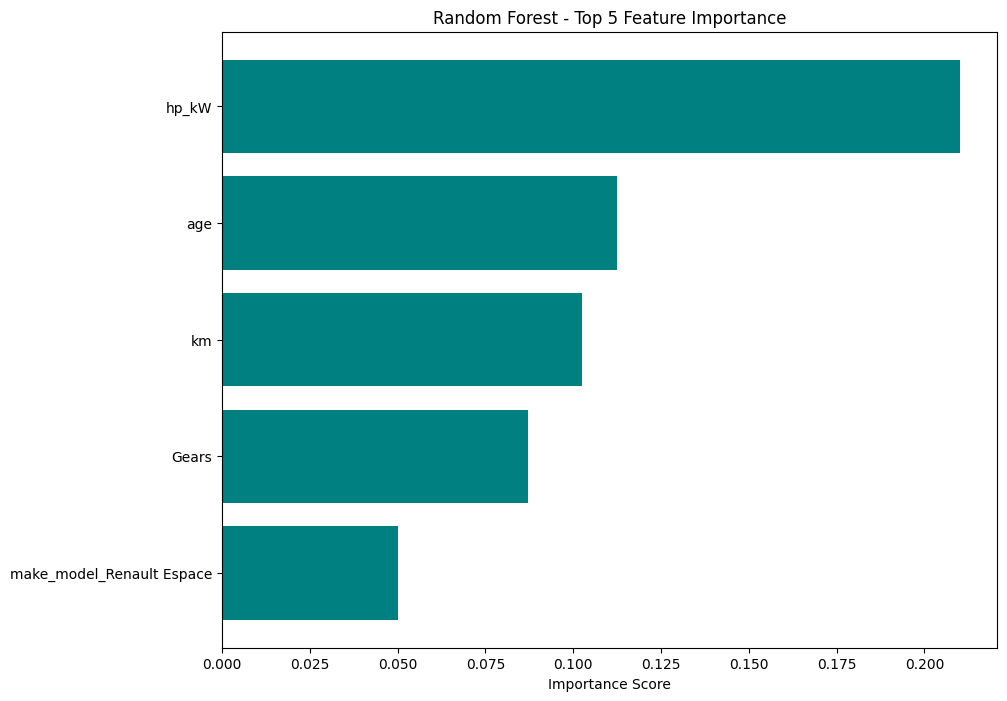

In [125]:
# Visualize feature importances
feature_importances = rf.feature_importances_
feature_names = X_train_transformed.columns
# Sort features based on importance
sorted_feature_importance = sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True)
# Extract feature names and their importance scores
features, importance = zip(*sorted_feature_importance)
# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 8))
plt.barh(features[:5], importance[:5], color='teal')
plt.title('Random Forest - Top 5 Feature Importance')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
plt.show()

## Final model
with the most important features + after hyperparameter tuning

In [126]:
new_features = ['make_model', 'Gears', 'km', 'age', 'hp_kW']
X_new = df[new_features].copy()
y = df.price

print(y)
display(X_new)

0        15770
1        14500
2        14640
3        14500
4        16790
         ...  
14237    39980
14238    39950
14239    39950
14240    39885
14241    39875
Name: price, Length: 14242, dtype: int64


,make_model,Gears,km,age,hp_kW
0,Audi A1,7.00,56013.00,3.00,66.00
1,Audi A1,7.00,80000.00,2.00,141.00
2,Audi A1,7.00,83450.00,3.00,85.00
3,Audi A1,6.00,73000.00,3.00,66.00
4,Audi A1,7.00,16200.00,3.00,66.00
...,...,...,...,...,...
14237,Renault Espace,6.00,100.00,0.00,118.00
14238,Renault Espace,6.00,1647.36,0.00,147.00
14239,Renault Espace,6.00,1000.00,0.00,165.00
14240,Renault Espace,7.00,9900.00,0.00,165.00


In [127]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [128]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
cat_onehot = ['make_model']
column_trans = make_column_transformer(
                        (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot),
                         remainder= StandardScaler(),
                         verbose_feature_names_out=False)

column_trans=column_trans.set_output(transform="pandas")

In [165]:
rf = RandomForestRegressor(random_state=42, max_depth=10,
max_features='sqrt', n_estimators=128)

operations = [("encoder", column_trans), ("RF_model", rf)]
new_pipe_model = Pipeline(steps=operations)
new_pipe_model.fit(X_train, y_train)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model'])],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestRegressor(max_depth=10, max_features='sqrt',
                                       n_estimators=128, random_state=42))])

In [166]:
train_val(new_pipe_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.93,0.91
mae,1250.00,1396.86
mse,3686580.75,5041928.55
rmse,1920.05,2245.42


In [167]:
pred = new_pipe_model.predict(X_test)

In [168]:
eval_metric(y_test, pred)

r2_score: 0.909749902360495 
mae: 1396.857368755629 
mse: 5041928.552934504 
rmse: 2245.423913860032


In [133]:
rf = RandomForestRegressor(random_state=42, max_depth=10,
max_features='sqrt', n_estimators=128)
operations = [("encoder", column_trans), ("RF_model", rf)]
pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                'neg_mean_absolute_error',
                                'neg_mean_squared_error',
                                'neg_root_mean_squared_error'],
                        cv = 10,
                        return_train_score=True)

In [134]:
pd.DataFrame(scores)
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                    0.91
train_r2                                   0.93
test_neg_mean_absolute_error           -1378.42
train_neg_mean_absolute_error          -1244.82
test_neg_mean_squared_error         -4788653.19
train_neg_mean_squared_error        -3645167.25
test_neg_root_mean_squared_error       -2184.38
train_neg_root_mean_squared_error      -1909.17
dtype: float64

## Final model

In [169]:
import pickle
# To save a pipeline using pickle
pickle.dump(new_pipe_model, open("MLDproject_Final_model", "wb"))


## Prediction

In [162]:
# with open('MLDproject_pipe_model.pkl', 'rb') as f:
#     Final_model = pickle.load(f)

In [170]:
Final_model = pickle.load(open("MLDproject_Final_model", "rb"))

In [171]:
data = [["Audi A1", 7.00, 56013.00, 2.00, 80.00]]
one_sample = pd.DataFrame(data, columns=['make_model', 'Gears', 'km', 'age', 'hp_kW'])
one_sample

,make_model,Gears,km,age,hp_kW
0,Audi A1,7.00,56013.00,2.00,80.00


In [172]:
Final_model.predict(one_sample)

array([17809.10558886])